**Assignment #1: Face Recognition**




---



*Team Members*

> 1.   Sohaila Hazem - 6388
2.   Areej Salahuddin - 6389
3.   Manar Abdelkader - 6485







---



*Problem Statement*


> In this assignment, we intent to perform face recognition. We will first perform dimensionality reduction on our data using PCA and LDA, and then use K-Nearest Neighbor Algorithm on the new reduced data. Secondly, we will use PCA, LDA, and K-NN to solve the classification problem (Faces VS Non-faces). Throughout our assignment, we will show the accuracy measure for our classification.





---



In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler

1. Download the Dataset and Understand the Format (10 Points).


> Using the 'AT&T Database of Faces', we downloaded our faces dataset which includes 400 images (40 subject each has 10 images). Every image is a grayscale image of size 92x112. 





---



In [ ]:
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/faces_dataset" "/content/faces_dataset" 
!ln -s "/gdrive/My Drive/nonfaces_dataset" "/content/nonfaces_dataset"
faces_path = '/content/faces_dataset'
nonfaces_path ='/content/nonfaces_dataset'

Mounted at /gdrive




---



2. Generate the Data Matrix 'D' and the Label vector 'y' (10 Points)

> By flattening every image into a vector of 10304 values, we appended all 400 vectors into our data matrix (D) of dimensions 400x10304, as well as creating a label vector (y) containing the label for each image (from 1:40 corresponding to the subject ID). 



In [ ]:
D = []
y = []         
for i in range(1,41):
  for j in range(1,11):
    image = Image.open(f"{faces_path}/s{i}/{j}.pgm")
    arr = np.asarray(image).flatten()    # flatten a matrix to one dimension
    D.append(arr)
    y.append(i)

print(f"D ({len(D)},{len(D[0])})")

D (400,10304)




---



3. Split the Dataset into Training and Test sets (10 Points).

> We split the data matrix into training and testing sets as follows: keeping the odd rows for training, and the even ones for testing. Resulting in 5 images per subject in the training set, and 5 images per subject in the testing set, and splitting the labels vector accordingly.



In [ ]:
# split dataset into training and test sets: (odd rows for training and even for tests) 
def split_50(total_rows):
  Xl_train = []
  Xl_test = []
  yl_train = []
  yl_test = []

  for i in range(total_rows):
    if i % 2 == 0:
      Xl_test.append((D[i]))                  #select even rows for testing
      yl_test.append((y[i]))
    else: 
      Xl_train.append((D[i]))                 #select odd rows for traning
      yl_train.append((y[i]))

  Xl_train = np.array(Xl_train)
  Xl_test = np.array(Xl_test)
  yl_train = np.array(yl_train)
  yl_test = np.array(yl_test)
  
  return Xl_train, Xl_test, yl_train, yl_test, Xl_train.shape[0]



---



8- (BONUS) splitting the data 70% for training and 30% for testing. (5 Points)

> Here we split the data matrix into training and testing sets as follows: 7 images per subject in the training set, and 3 images per subject in the testing set, and splitting the labels vector accordingly.



In [ ]:
# bonus split (training 70: testing 30)
def split_70(total_rows):

  Xl_train_70 = []
  Xl_test_30 = []
  yl_train_70 = []
  yl_test_30 = []

  counter = 0
  for i in range(total_rows):
    
    if (counter<=6):
      Xl_train_70.append((D[i]))              
      yl_train_70.append((y[i]))

    elif(counter>6 and counter <10):
      Xl_test_30.append((D[i]))                  
      yl_test_30.append((y[i]))
      if (counter == 9): 
        counter = -1

    counter += 1

  Xl_train_70 = np.array(Xl_train_70)
  Xl_test_30 = np.array(Xl_test_30)
  yl_train_70 = np.array(yl_train_70)
  yl_test_30 = np.array(yl_test_30)


  
  return Xl_train_70, Xl_test_30, yl_train_70, yl_test_30, Xl_train_70.shape[0]



---



---


- K-NN Classifier Function. (For both PCA and LDA)

> For classification, we used K-Nearest Neighbor. It is going to predict whom the image belongs to, and then we will calculate the accuracy of this prediction.

In [ ]:
def KNN(X_train,X_test,label_train,label_test,k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, label_train)
  label_prediction = knn.predict(X_test)
  accuracy = accuracy_score(label_test, label_prediction)
  return accuracy 



---



---

4. Classification using PCA (30 points)

>   1.   We used NumPy to calculate the mean vector, covariance matrix, eigenvalues, and eigenvectors (descendingly-sorted later) using ONLY the training set.
  2.   Using the given set of alphas and the fraction of total variance, we computed the dimensionality for each alpha (the number of features needed for each alpha).
  3.   We projected the training set, and test sets separately using the same 
projection matrix.
  4.   We first used a simple K-NN classifier where k = 1, then performed classifier tuning (No. 6) where k = 1, 3, 5, and 7. 







---



- Helper Function for PCA: To compute the number of features for each alpha.

In [ ]:
#fraction of total variance
def f(eigen_values, alpha_v):
  chosen_r = [0, 0, 0, 0]
  chosen_eigen_sum = 0
  index = 0
  r = 0
  eigen_sum = eigen_values.sum()

  #choose smallest r so that f(r) >= alpha (choose dimensionality)
  for x in eigen_values:
        chosen_eigen_sum += x
        if chosen_eigen_sum / eigen_sum >= alpha_v[index]:
          chosen_r[index] = r
          index += 1
          if index == 4:
            break
        r += 1  
  return chosen_r

In [ ]:
def PCA(X_train, yl_train, X_test, yl_test):
  mean_vector = np.mean(D_train, axis = 0)       # compute the mean
  Z = D_train - mean_vector                      # centering the data
  COV = np.cov(Z, rowvar = False, bias = True)   # get the covariance matrix
  eigen_values, eigen_vectors = np.linalg.eigh(COV)
  sorted_eigenvectors = eigen_vectors.T[::-1]
  sorted_eigenvalues = eigen_values.T[::-1]

  alphas = [0.8, 0.85, 0.9, 0.95]  # alpha_vector  

  r = f(sorted_eigenvalues, alphas)  # choose dimensionality

  print(f"Number of features after reduction for each alpha: {r}\n")
  
  # reporting accuracy for every value of alpha seperately using KNN
  max_accuracies = [] 

  for i in range(0,4):
    P = sorted_eigenvectors[0:r[i]]
    P = P[::-1]
    A_train = np.dot(X_train, np.transpose(P))    # projecting the training data onto the new P
    A_test = np.dot(X_test, np.transpose(P))      # projecting the testing data onto the new P
    
    # for each alpha
    print(f"\n {i + 1}) α = {alphas[i]}\n")

    # simple classifier (first nearest neighbor)
    accuracy_1 = KNN(A_train,A_test,yl_train,yl_test,1)
    print(f"A) First Nearest Neighbor (k = 1), accuracy = {accuracy_1 * 100} %")

    # classifier tuning (at k = 1,3,5,7)
    
    k_neighbors = [1,3,5,7] 
    accuracies_PCA = []
    print("\nB) Classifier Tuning")
    for k in k_neighbors: 
      accuracy = KNN(A_train,A_test,yl_train,yl_test,k)
      accuracies_PCA.append(accuracy)
      print(f"for k = {k}, the accuracy is {accuracy * 100} %")  


    max_accuracies.append(max(accuracies_PCA))
    
    plt.title(f'K-NN Classifier Tuning (r = {r[i]})')
    plt.xlabel('K')
    plt.ylabel('Accuracy ')
    plt.plot(k_neighbors,accuracies_PCA)
    plt.show()

    print(f"\nHighest Accuracy for α = {alphas[i]} is {max_accuracies[i] * 100} %")
    print("---------------------------------------------------------------------")

  print("---------------------------------------------------------------------")  
  print("---------------------------------------------------------------------") 

  # relation between alpha and classification accuracy
  plt.figure(figsize = (7,7))
  plt.plot(alphas, max_accuracies)
  plt.title("Relation between α and classification accuracy")
  plt.xlabel('α')
  plt.ylabel('Accuracy')
  plt.show()
  
  #sorts alphas according to the highest accuracies
  xy_sorted = np.array(sorted(zip(max_accuracies,alphas),reverse=True)).T

  print(f"\nHighest Accuracy ({xy_sorted[0][0]*100}%) was at α = {xy_sorted[1][0]} and k = 1.\n")     
 
  return xy_sorted[0][0]*100



---


**Classification using PCA on 50% split: includes Classifier Tuning (6)**


>   - Reports Accuracy for every value of   alpha separately.
  - Includes a plot between alpha and classification accuracy.






In [ ]:
# splitting 50% 
D_train, D_test, y_train, y_test, samples_count_50 = split_50(400)

Number of features after reduction for each alpha: [36, 52, 76, 115]


 1) α = 0.8

A) First Nearest Neighbor (k = 1), accuracy = 93.0 %

B) Classifier Tuning
for k = 1, the accuracy is 93.0 %
for k = 3, the accuracy is 85.5 %
for k = 5, the accuracy is 81.0 %
for k = 7, the accuracy is 77.5 %


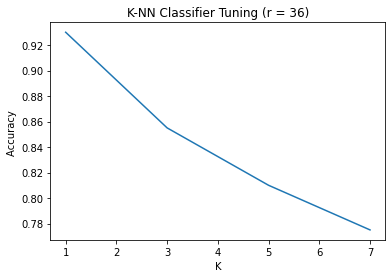


Highest Accuracy for α = 0.8 is 93.0 %
---------------------------------------------------------------------

 2) α = 0.85

A) First Nearest Neighbor (k = 1), accuracy = 94.0 %

B) Classifier Tuning
for k = 1, the accuracy is 94.0 %
for k = 3, the accuracy is 86.0 %
for k = 5, the accuracy is 83.0 %
for k = 7, the accuracy is 77.0 %


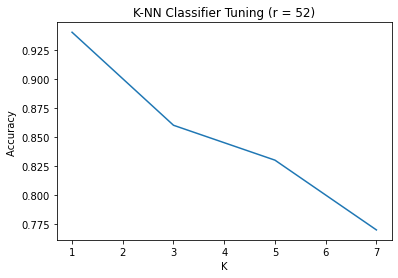


Highest Accuracy for α = 0.85 is 94.0 %
---------------------------------------------------------------------

 3) α = 0.9

A) First Nearest Neighbor (k = 1), accuracy = 94.5 %

B) Classifier Tuning
for k = 1, the accuracy is 94.5 %
for k = 3, the accuracy is 85.0 %
for k = 5, the accuracy is 81.0 %
for k = 7, the accuracy is 76.0 %


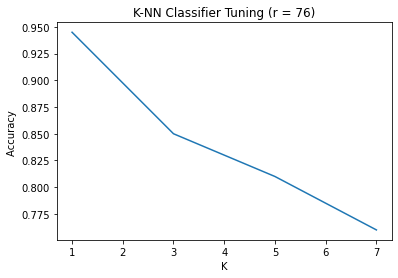


Highest Accuracy for α = 0.9 is 94.5 %
---------------------------------------------------------------------

 4) α = 0.95

A) First Nearest Neighbor (k = 1), accuracy = 93.5 %

B) Classifier Tuning
for k = 1, the accuracy is 93.5 %
for k = 3, the accuracy is 84.5 %
for k = 5, the accuracy is 81.5 %
for k = 7, the accuracy is 74.0 %


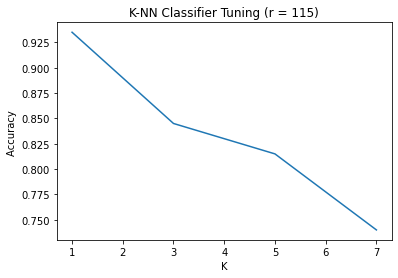


Highest Accuracy for α = 0.95 is 93.5 %
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


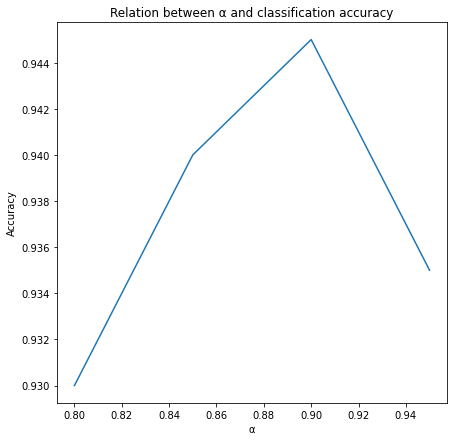


Highest Accuracy (94.5%) was at α = 0.9 and k = 1.



In [ ]:
# PCA 
# 1. 50:50 split
accuracy_PCA_50 = PCA(D_train, y_train, D_test, y_test)



> The Relationship between alpha and classification accuracy: is that as alpha increases, the classification accuracy increases UNTIL a certain point where the increased number of features are just adding noise at this point.





---



---



5. Classification Using LDA (30 Points) 



> Using the modified pseudo code in the assignment, we:
1.   We created class-specific subsets inside (classified_D).
2.   Calculated the mean vector for every class using NumPy. 
3.   Calculated the between-class scatter matrix (Sb) and the within-class scatter matrix (S).
4.   We used 39 dominant eigenvectors instead of just one, resulting in a projection matrix (U39x10304). 
5.   Projected the training set, and test sets separately using the same 
projection matrix U.
6.   We first used a simple K-NN classifier where k = 1, then performed classifier tuning (No. 6) where k = 1, 3, 5, and 7. 






In [ ]:
def LDA(X_train, yl_train, X_test, yl_test, split, no_of_classes, samples_count):
  classified_D = []   # class specific subsets
  m = no_of_classes   # (either per subject '40' or face/non-face '2')
  Sb = np.zeros((X_train.shape[1], X_train.shape[1]))   # between-class scatter matrix
  S = np.zeros((X_train.shape[1], X_train.shape[1]))    # within-class scatter matrix
  overall_smean = np.mean(X_train, axis=0).reshape(-1,1)

  if split == 0:
    nk = 5    # number of training samples per subject
    for i in range(0, samples_count, 5):
      classified_D.append(X_train[i : i + 5])

  elif split == 1:  # BONUS
    nk = 7
    for i in range(0, samples_count, 7):
      classified_D.append(X_train[i : i + 7])
 
  # calculating mean vector for every class
  class_mean = []  
  for i in range(m):
    class_mean.append(np.mean(classified_D[i],axis=0))

  # calculating between-class scatter matrix
  for i in range(m):
    diff = class_mean[i].reshape(-1,1) - overall_smean

    Sb += nk * np.dot((diff),(np.transpose(diff)))

  # calculating within-class scatter matrix
  for i in range(m):
    Z_i = classified_D[i] - class_mean[i]            # centering class
    S += np.dot(np.transpose(Z_i), Z_i)

  _, eigenvectors = np.linalg.eigh(np.dot(np.linalg.inv(S), Sb))
  # orders the eigen vectors and uses 39 dominant eigen vectors
  eigenvectors = eigenvectors.T[::-1]
  U = eigenvectors[:39]
  # projecting the data onto the new reduced dimensions
  D_new_train = np.dot(X_train, U.T)
  D_new_test = np.dot(X_test, U.T) 
  
  # simple classifier (first nearest neighbor)
  accuracy_1 = KNN(D_new_train, D_new_test,yl_train,yl_test,1)
  print(f"A) First Nearest Neighbor (k = 1), accuracy = {accuracy_1 * 100} %")


  # classifier tuning (at k = 1,3,5,7)
  accuracies_LDA = []    
  k_neighbors = [1,3,5,7] 
  print("\nB) Classifier Tuning")
  for k in k_neighbors: 
    accuracy = KNN(D_new_train,D_new_test,yl_train,yl_test,k)
    accuracies_LDA.append(accuracy)
    print(f"for k = {k}, the accuracy is {accuracy * 100} %")  
 
  plt.title(f'K-NN Classifier Tuning')
  plt.xlabel('K')
  plt.ylabel('Accuracy ')
  plt.plot(k_neighbors, accuracies_LDA)
  plt.show()
  print(f"\nHighest Accuracy = {max(accuracies_LDA)*100} % at k = 1") 
  return max(accuracies_LDA)*100



---



**Classification using LDA on 50% split: includes Classifier Tuning (6)**


> Includes comparison plot with PCA results.



A) First Nearest Neighbor (k = 1), accuracy = 94.5 %

B) Classifier Tuning
for k = 1, the accuracy is 94.5 %
for k = 3, the accuracy is 87.0 %
for k = 5, the accuracy is 84.0 %
for k = 7, the accuracy is 79.0 %


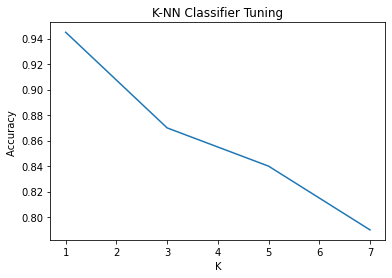


Highest Accuracy = 94.5 % at k = 1


In [ ]:
# LDA 
# 1. 50:50 split
accuracy_LDA_50 = LDA(D_train, y_train, D_test, y_test, 0, 40, samples_count_50)



---



**Comparing the results to PCA results**



> For PCA, we plotted highest accuracy for each k in all alphas.



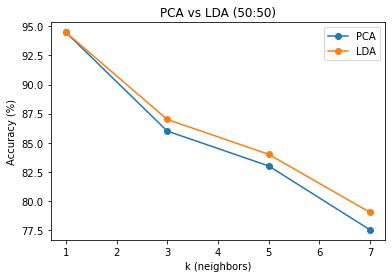

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title('PCA vs LDA (50:50)')
ax.set_xlabel('k (neighbors)')
ax.set_ylabel('Accuracy (%)')
plt.plot([1,3,5,7],[94.5,86.0,83.0,77.5] , marker = 'o', label = 'PCA')  
plt.plot([1,3,5,7], [94.5, 87.0, 84.0, 79.0], marker = 'o', label = 'LDA')
plt.legend()
plt.show()

***COMMENTS***


> LDA was higher than PCA when the dataset was splitted in a 50% manner.





---



---



8- BONUS (5 Points)


> After changing the number of instances per subject to be 7 in the training set, while keeping the rest 3 for the testing set, we performed classification using PCA and LDA. (Same as before)



In [ ]:
# splitting 70% and 30% (BONUS)
D_train_70, D_test_30, y_train_70, y_test_30, samples_count_70 = split_70(400)



---



Number of features after reduction for each alpha: [36, 52, 76, 115]


 1) α = 0.8

A) First Nearest Neighbor (k = 1), accuracy = 95.83333333333334 %

B) Classifier Tuning
for k = 1, the accuracy is 95.83333333333334 %
for k = 3, the accuracy is 95.0 %
for k = 5, the accuracy is 90.0 %
for k = 7, the accuracy is 86.66666666666667 %


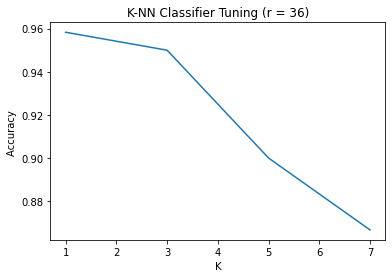


Highest Accuracy for α = 0.8 is 95.83333333333334 %
---------------------------------------------------------------------

 2) α = 0.85

A) First Nearest Neighbor (k = 1), accuracy = 95.83333333333334 %

B) Classifier Tuning
for k = 1, the accuracy is 95.83333333333334 %
for k = 3, the accuracy is 95.0 %
for k = 5, the accuracy is 90.0 %
for k = 7, the accuracy is 85.83333333333333 %


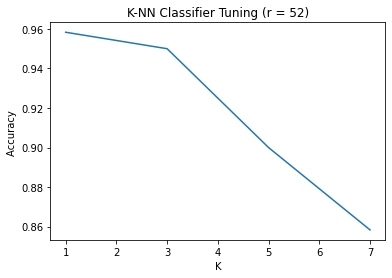


Highest Accuracy for α = 0.85 is 95.83333333333334 %
---------------------------------------------------------------------

 3) α = 0.9

A) First Nearest Neighbor (k = 1), accuracy = 96.66666666666667 %

B) Classifier Tuning
for k = 1, the accuracy is 96.66666666666667 %
for k = 3, the accuracy is 95.0 %
for k = 5, the accuracy is 90.0 %
for k = 7, the accuracy is 86.66666666666667 %


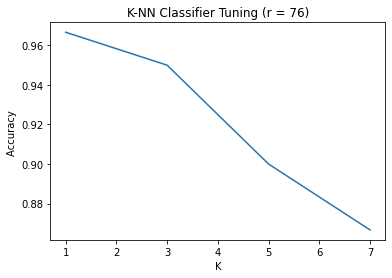


Highest Accuracy for α = 0.9 is 96.66666666666667 %
---------------------------------------------------------------------

 4) α = 0.95

A) First Nearest Neighbor (k = 1), accuracy = 95.83333333333334 %

B) Classifier Tuning
for k = 1, the accuracy is 95.83333333333334 %
for k = 3, the accuracy is 95.83333333333334 %
for k = 5, the accuracy is 89.16666666666667 %
for k = 7, the accuracy is 87.5 %


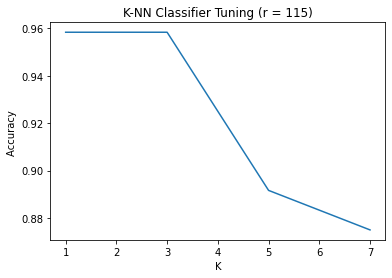


Highest Accuracy for α = 0.95 is 95.83333333333334 %
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


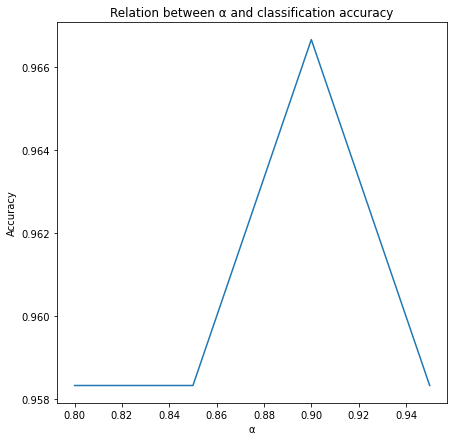


Highest Accuracy (96.66666666666667%) was at α = 0.9 and k = 1.



In [ ]:
# PCA 
# 2. (BONUS) 70:30 split
accuracy_PCA_70_30 = PCA(D_train_70, y_train_70, D_test_30, y_test_30)



---



---



A) First Nearest Neighbor (k = 1), accuracy = 94.16666666666667 %

B) Classifier Tuning
for k = 1, the accuracy is 94.16666666666667 %
for k = 3, the accuracy is 92.5 %
for k = 5, the accuracy is 86.66666666666667 %
for k = 7, the accuracy is 85.0 %


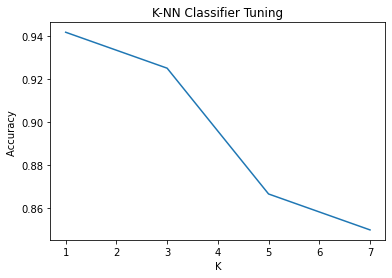


Highest Accuracy = 94.16666666666667 % at k = 1


In [ ]:
# LDA
# 2. (BONUS) 70:30 split
accuracy_LDA_70_30 = LDA(D_train_70, y_train_70, D_test_30, y_test_30, 1, 40, samples_count_70)



---



**Comparing PCA and LDA with 70:30 split (BONUS)**



> For PCA, we plotted highest accuracy for each k in all alphas.


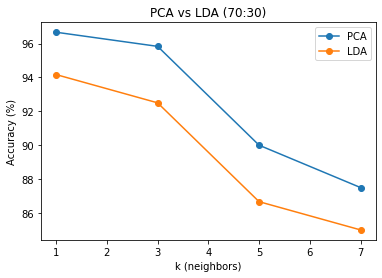

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title('PCA vs LDA (70:30)')
ax.set_xlabel('k (neighbors)')
ax.set_ylabel('Accuracy (%)')
plt.plot([1,3,5,7],[96.66667, 95.83334, 90.0, 87.5] , marker = 'o', label = 'PCA')  
plt.plot([1,3,5,7], [94.16667, 92.5, 86.6667, 85.0], marker = 'o', label = 'LDA')
plt.legend()
plt.show()

***COMMENTS***


> PCA was higher than LDA when the dataset was splitted in a 70% manner.





---



---


6. Classifier Tuning (20 Points)

***TIE BREAKING COMMENTS***


> 1. **PCA**
- The preferred parameter set for PCA in the case of 50:50 split is (alpha 'explained variance' = 0.9) and (k = 1) this gives an accuracy of 94.5 %. 
- The preferred parameter set for PCA in the case of 70:30 split is (alpha 'explained variance' = 0.9) and (k = 1) this gives an accuracy of 96.6667 %. 
- For PCA, the 70:30 split gives better accuracy than 50:50 split.

----------------------------------------

> 2. **LDA**
- The preferred parameter set for LDA in the case of 50:50 split is k = 1 giving an accuracy of 94.5 %.
- The preferred parameter set for LDA in the case of 70:30 split is k = 1 giving an accuracy of 94.16667 %.
- For LDA, the 50:50 split gives better accuracy than 70:30 split.

----------------------------------------

> 3. **PCA vs LDA**
- For PCA and LDA together, both PCA and LDA give off similar accuracies in 50:50 split, and in 70:30 split PCA has a higher accuracy than LDA.

-----------------------------------------
 
> 4. When dealing with **ties** in **K-NN**, in odd number of neighbors, like k = 3, we can use the majority vote. Another alternative is to use a weighted computation that gives bigger weights to points that are closer to point of interest, thus breaking the tie. 






---

---

7. Compare vs Non-Face Images (15 Points) 


> 1. We Downloaded 400 non-face images, giving the label (1) for faces, the label (0) for non-faces. 
2. We used 39 eigenvectors for LDA like we did before.
3. We used 400, 200, and 100 non-faces with the plots. (failure and success cases)
4. We plotted the accuracy vs the number of non-face images while fixing the number of face images. (for both PCA and LDA in 50% and 70% split)





---



- Appending non faces to the existing dataset faces.

In [ ]:
for i in range(1,401):
  image = Image.open(f"{nonfaces_path}/non ({i}).pgm")
  arr = np.asarray(image).flatten()    # flatten a matrix to one dimension
  D.append(arr)

y = []
for i in range(400):
  y.append(1)
for i in range(400):
  y.append(0)

D = np.array(D) 
print(D.shape) 


(800, 10304)




---



In [ ]:
max_acc_PCA_50 = []
max_acc_LDA_50 = []
max_acc_PCA_70 = []
max_acc_LDA_70 = []



---



***400 Faces and 400 Non-faces.***


> **I. Splitting 50:50 for both PCA and LDA.**



In [ ]:
D_train, D_test, y_train, y_test, samples_count_half = split_50(800)



> **PCA**



Number of features after reduction for each alpha: [42, 67, 107, 177]


 1) α = 0.8

A) First Nearest Neighbor (k = 1), accuracy = 96.75 %

B) Classifier Tuning
for k = 1, the accuracy is 96.75 %
for k = 3, the accuracy is 96.25 %
for k = 5, the accuracy is 95.5 %
for k = 7, the accuracy is 94.75 %


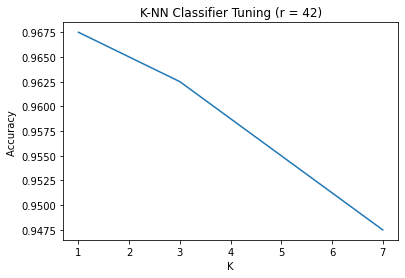


Highest Accuracy for α = 0.8 is 96.75 %
---------------------------------------------------------------------

 2) α = 0.85

A) First Nearest Neighbor (k = 1), accuracy = 96.5 %

B) Classifier Tuning
for k = 1, the accuracy is 96.5 %
for k = 3, the accuracy is 96.0 %
for k = 5, the accuracy is 94.75 %
for k = 7, the accuracy is 93.0 %


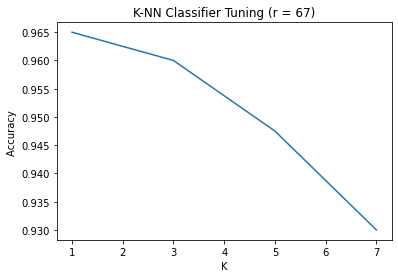


Highest Accuracy for α = 0.85 is 96.5 %
---------------------------------------------------------------------

 3) α = 0.9

A) First Nearest Neighbor (k = 1), accuracy = 96.0 %

B) Classifier Tuning
for k = 1, the accuracy is 96.0 %
for k = 3, the accuracy is 94.75 %
for k = 5, the accuracy is 93.75 %
for k = 7, the accuracy is 92.75 %


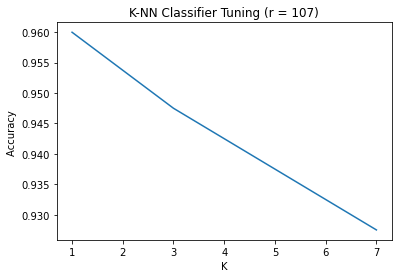


Highest Accuracy for α = 0.9 is 96.0 %
---------------------------------------------------------------------

 4) α = 0.95

A) First Nearest Neighbor (k = 1), accuracy = 94.5 %

B) Classifier Tuning
for k = 1, the accuracy is 94.5 %
for k = 3, the accuracy is 92.0 %
for k = 5, the accuracy is 90.5 %
for k = 7, the accuracy is 88.5 %


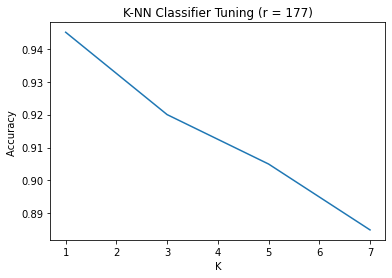


Highest Accuracy for α = 0.95 is 94.5 %
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


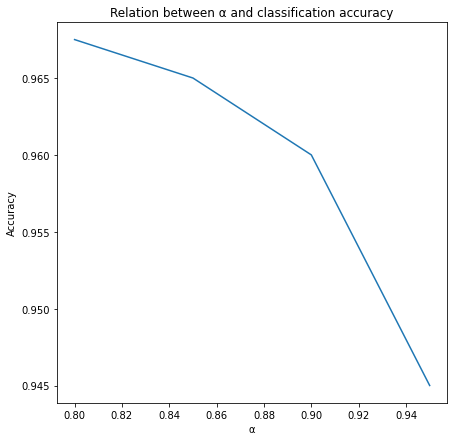


Highest Accuracy (96.75%) was at α = 0.8 and k = 1.



In [ ]:
accuracy_PCA_400_50 = PCA(D_train, y_train, D_test, y_test)
max_acc_PCA_50.append(accuracy_PCA_400_50)


> **LDA**



A) First Nearest Neighbor (k = 1), accuracy = 97.5 %

B) Classifier Tuning
for k = 1, the accuracy is 97.5 %
for k = 3, the accuracy is 96.0 %
for k = 5, the accuracy is 95.5 %
for k = 7, the accuracy is 95.0 %


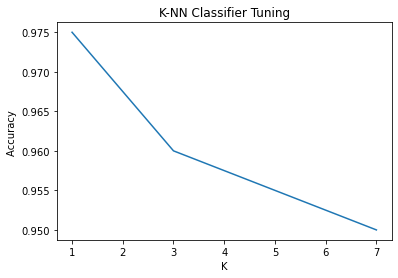


Highest Accuracy = 97.5 % at k = 1


In [ ]:
accuracy_LDA_400_50 = LDA(D_train, y_train, D_test, y_test, 0, 2, samples_count_half)
max_acc_LDA_50.append(accuracy_LDA_400_50)



---





> **II. Splitting 70:30 for both PCA and LDA.**



In [ ]:
D_train_70, D_test_30, y_train_70, y_test_30, samplesCount_70 = split_70(800)

> **PCA**

Number of features after reduction for each alpha: [42, 67, 107, 177]


 1) α = 0.8

A) First Nearest Neighbor (k = 1), accuracy = 98.33333333333333 %

B) Classifier Tuning
for k = 1, the accuracy is 98.33333333333333 %
for k = 3, the accuracy is 97.91666666666666 %
for k = 5, the accuracy is 97.5 %
for k = 7, the accuracy is 97.5 %


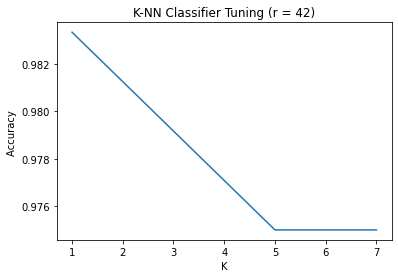


Highest Accuracy for α = 0.8 is 98.33333333333333 %
---------------------------------------------------------------------

 2) α = 0.85

A) First Nearest Neighbor (k = 1), accuracy = 97.5 %

B) Classifier Tuning
for k = 1, the accuracy is 97.5 %
for k = 3, the accuracy is 97.08333333333333 %
for k = 5, the accuracy is 96.66666666666667 %
for k = 7, the accuracy is 97.08333333333333 %


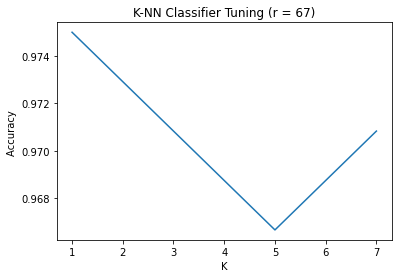


Highest Accuracy for α = 0.85 is 97.5 %
---------------------------------------------------------------------

 3) α = 0.9

A) First Nearest Neighbor (k = 1), accuracy = 98.33333333333333 %

B) Classifier Tuning
for k = 1, the accuracy is 98.33333333333333 %
for k = 3, the accuracy is 97.08333333333333 %
for k = 5, the accuracy is 96.66666666666667 %
for k = 7, the accuracy is 97.08333333333333 %


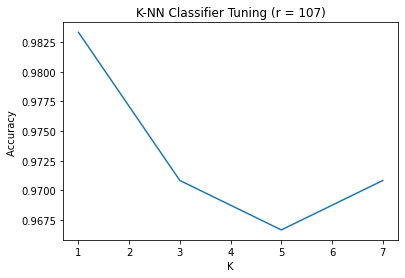


Highest Accuracy for α = 0.9 is 98.33333333333333 %
---------------------------------------------------------------------

 4) α = 0.95

A) First Nearest Neighbor (k = 1), accuracy = 98.33333333333333 %

B) Classifier Tuning
for k = 1, the accuracy is 98.33333333333333 %
for k = 3, the accuracy is 97.5 %
for k = 5, the accuracy is 97.5 %
for k = 7, the accuracy is 97.08333333333333 %


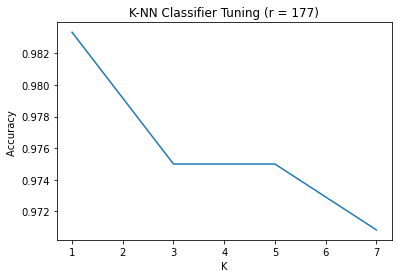


Highest Accuracy for α = 0.95 is 98.33333333333333 %
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


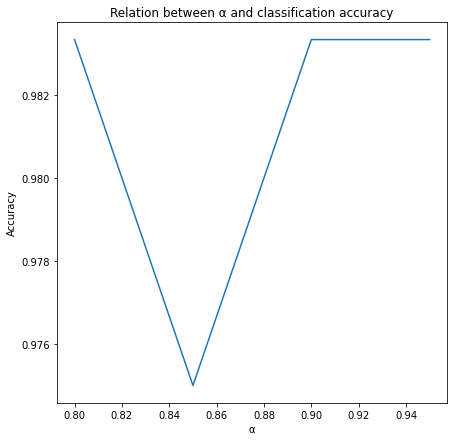


Highest Accuracy (98.33333333333333%) was at α = 0.95 and k = 1.



In [ ]:
accuracy_PCA_400_70 = PCA(D_train_70, y_train_70, D_test_30, y_test_30)
max_acc_PCA_70.append(accuracy_PCA_400_70)

> **LDA**


A) First Nearest Neighbor (k = 1), accuracy = 96.25 %

B) Classifier Tuning
for k = 1, the accuracy is 96.25 %
for k = 3, the accuracy is 96.66666666666667 %
for k = 5, the accuracy is 95.41666666666667 %
for k = 7, the accuracy is 94.58333333333333 %


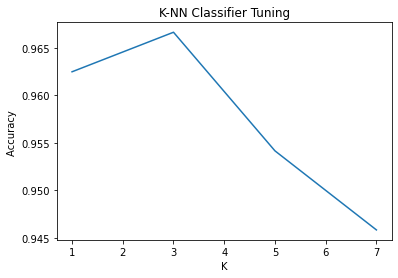


Highest Accuracy = 96.66666666666667 % at k = 1


In [ ]:
accuracy_LDA_400_70 = LDA(D_train_70, y_train_70, D_test_30, y_test_30, 1, 2, samplesCount_70)
max_acc_LDA_70.append(accuracy_LDA_400_70)



---
---

***400 Faces and 200 Non-faces.***


> **I. Splitting 50:50 for both PCA and LDA.**



In [ ]:
D_train, D_test, y_train, y_test, samplesCount50 = split_50(600)


> **PCA**



Number of features after reduction for each alpha: [36, 56, 86, 140]


 1) α = 0.8

A) First Nearest Neighbor (k = 1), accuracy = 94.33333333333334 %

B) Classifier Tuning
for k = 1, the accuracy is 94.33333333333334 %
for k = 3, the accuracy is 93.0 %
for k = 5, the accuracy is 92.0 %
for k = 7, the accuracy is 92.0 %


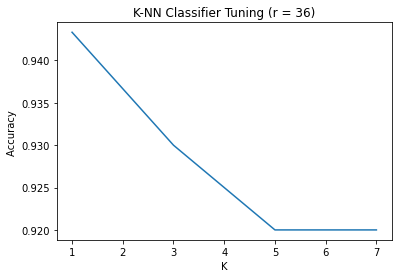


Highest Accuracy for α = 0.8 is 94.33333333333334 %
---------------------------------------------------------------------

 2) α = 0.85

A) First Nearest Neighbor (k = 1), accuracy = 94.0 %

B) Classifier Tuning
for k = 1, the accuracy is 94.0 %
for k = 3, the accuracy is 92.66666666666666 %
for k = 5, the accuracy is 91.0 %
for k = 7, the accuracy is 90.33333333333333 %


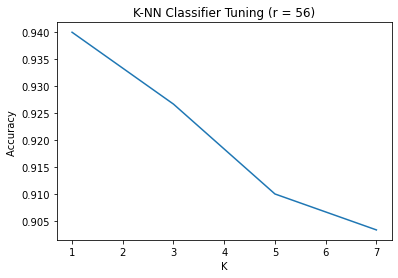


Highest Accuracy for α = 0.85 is 94.0 %
---------------------------------------------------------------------

 3) α = 0.9

A) First Nearest Neighbor (k = 1), accuracy = 93.0 %

B) Classifier Tuning
for k = 1, the accuracy is 93.0 %
for k = 3, the accuracy is 89.66666666666666 %
for k = 5, the accuracy is 88.66666666666667 %
for k = 7, the accuracy is 88.0 %


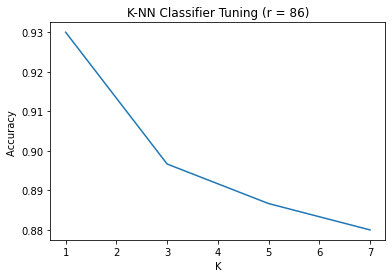


Highest Accuracy for α = 0.9 is 93.0 %
---------------------------------------------------------------------

 4) α = 0.95

A) First Nearest Neighbor (k = 1), accuracy = 92.0 %

B) Classifier Tuning
for k = 1, the accuracy is 92.0 %
for k = 3, the accuracy is 88.0 %
for k = 5, the accuracy is 86.66666666666667 %
for k = 7, the accuracy is 86.66666666666667 %


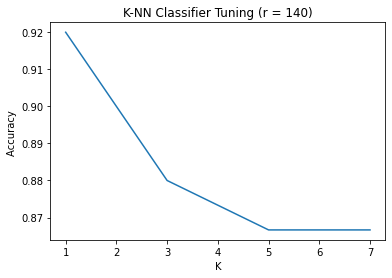


Highest Accuracy for α = 0.95 is 92.0 %
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


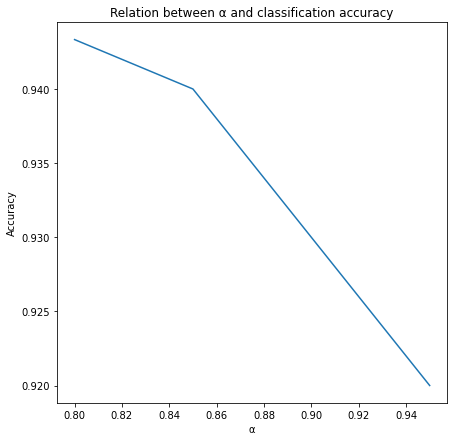


Highest Accuracy (94.33333333333334%) was at α = 0.8 and k = 1.



In [ ]:
accuracy_PCA_200_50 = PCA(D_train, y_train, D_test, y_test)
max_acc_PCA_50.append(accuracy_PCA_200_50)

> **LDA**

A) First Nearest Neighbor (k = 1), accuracy = 96.0 %

B) Classifier Tuning
for k = 1, the accuracy is 96.0 %
for k = 3, the accuracy is 94.33333333333334 %
for k = 5, the accuracy is 91.66666666666666 %
for k = 7, the accuracy is 91.0 %


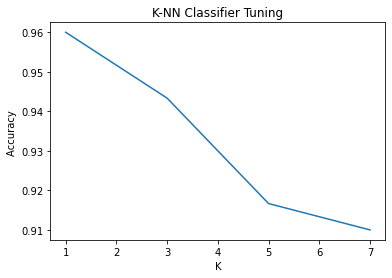


Highest Accuracy = 96.0 % at k = 1


In [ ]:
accuracy_LDA_200_50 = LDA(D_train, y_train, D_test, y_test, 0, 2, samplesCount50)
max_acc_LDA_50.append(accuracy_LDA_200_50)



---





> **II. Splitting 70:30 for both PCA and LDA.**



In [ ]:
D_train_70, D_test_30, y_train_70, y_test_30, samplesCount70 = split_70(600)

> **PCA**

Number of features after reduction for each alpha: [36, 56, 86, 140]


 1) α = 0.8

A) First Nearest Neighbor (k = 1), accuracy = 97.77777777777777 %

B) Classifier Tuning
for k = 1, the accuracy is 97.77777777777777 %
for k = 3, the accuracy is 95.55555555555556 %
for k = 5, the accuracy is 95.55555555555556 %
for k = 7, the accuracy is 95.0 %


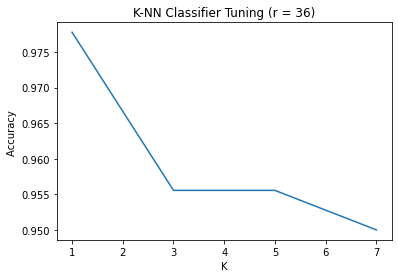


Highest Accuracy for α = 0.8 is 97.77777777777777 %
---------------------------------------------------------------------

 2) α = 0.85

A) First Nearest Neighbor (k = 1), accuracy = 98.88888888888889 %

B) Classifier Tuning
for k = 1, the accuracy is 98.88888888888889 %
for k = 3, the accuracy is 96.11111111111111 %
for k = 5, the accuracy is 95.0 %
for k = 7, the accuracy is 94.44444444444444 %


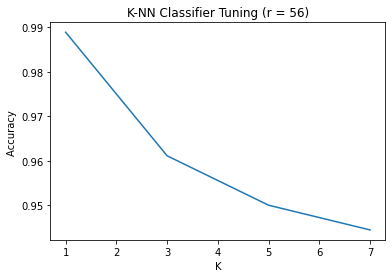


Highest Accuracy for α = 0.85 is 98.88888888888889 %
---------------------------------------------------------------------

 3) α = 0.9

A) First Nearest Neighbor (k = 1), accuracy = 98.33333333333333 %

B) Classifier Tuning
for k = 1, the accuracy is 98.33333333333333 %
for k = 3, the accuracy is 96.66666666666667 %
for k = 5, the accuracy is 95.55555555555556 %
for k = 7, the accuracy is 94.44444444444444 %


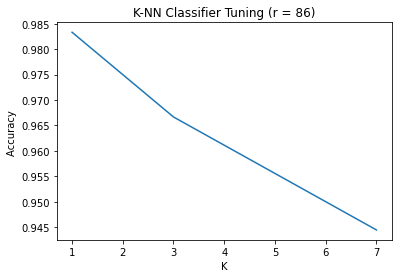


Highest Accuracy for α = 0.9 is 98.33333333333333 %
---------------------------------------------------------------------

 4) α = 0.95

A) First Nearest Neighbor (k = 1), accuracy = 98.33333333333333 %

B) Classifier Tuning
for k = 1, the accuracy is 98.33333333333333 %
for k = 3, the accuracy is 96.11111111111111 %
for k = 5, the accuracy is 94.44444444444444 %
for k = 7, the accuracy is 94.44444444444444 %


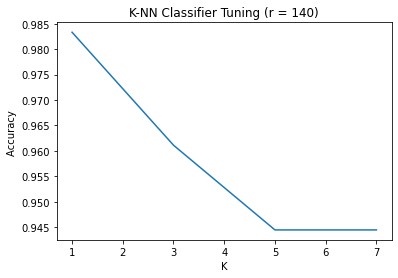


Highest Accuracy for α = 0.95 is 98.33333333333333 %
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


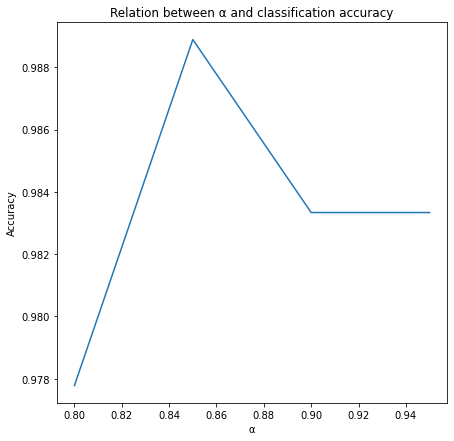


Highest Accuracy (98.88888888888889%) was at α = 0.85 and k = 1.



In [ ]:
accuracy_PCA_200_70 = PCA(D_train_70, y_train_70, D_test_30, y_test_30)
max_acc_PCA_70.append(accuracy_PCA_200_70)

> **LDA**



A) First Nearest Neighbor (k = 1), accuracy = 95.55555555555556 %

B) Classifier Tuning
for k = 1, the accuracy is 95.55555555555556 %
for k = 3, the accuracy is 93.33333333333333 %
for k = 5, the accuracy is 90.55555555555556 %
for k = 7, the accuracy is 90.55555555555556 %


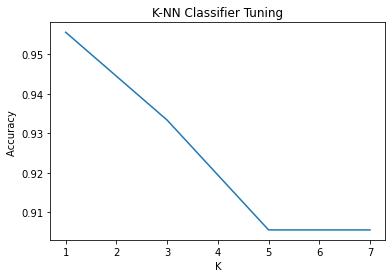


Highest Accuracy = 95.55555555555556 % at k = 1


In [ ]:
accuracy_LDA_200_70 = LDA(D_train_70, y_train_70, D_test_30, y_test_30, 1, 2, samplesCount70)
max_acc_LDA_70.append(accuracy_LDA_200_70)



---
---


***400 Faces and 100 Non-faces.***

> **I. Splitting 50:50 for both PCA and LDA.**


In [ ]:
D_train, D_test, y_train, y_test, samples_count = split_50(500)

> **PCA**

Number of features after reduction for each alpha: [34, 50, 77, 124]


 1) α = 0.8

A) First Nearest Neighbor (k = 1), accuracy = 94.8 %

B) Classifier Tuning
for k = 1, the accuracy is 94.8 %
for k = 3, the accuracy is 93.2 %
for k = 5, the accuracy is 92.4 %
for k = 7, the accuracy is 92.80000000000001 %


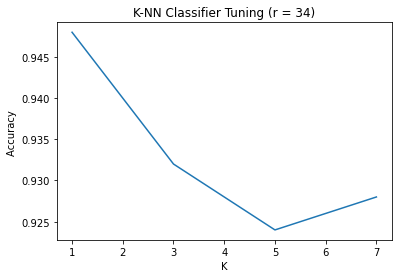


Highest Accuracy for α = 0.8 is 94.8 %
---------------------------------------------------------------------

 2) α = 0.85

A) First Nearest Neighbor (k = 1), accuracy = 94.0 %

B) Classifier Tuning
for k = 1, the accuracy is 94.0 %
for k = 3, the accuracy is 92.80000000000001 %
for k = 5, the accuracy is 92.4 %
for k = 7, the accuracy is 92.80000000000001 %


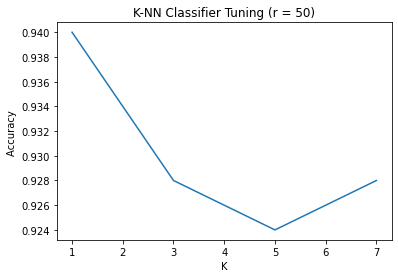


Highest Accuracy for α = 0.85 is 94.0 %
---------------------------------------------------------------------

 3) α = 0.9

A) First Nearest Neighbor (k = 1), accuracy = 93.60000000000001 %

B) Classifier Tuning
for k = 1, the accuracy is 93.60000000000001 %
for k = 3, the accuracy is 92.0 %
for k = 5, the accuracy is 92.0 %
for k = 7, the accuracy is 92.0 %


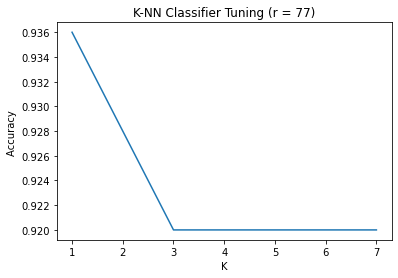


Highest Accuracy for α = 0.9 is 93.60000000000001 %
---------------------------------------------------------------------

 4) α = 0.95

A) First Nearest Neighbor (k = 1), accuracy = 92.80000000000001 %

B) Classifier Tuning
for k = 1, the accuracy is 92.80000000000001 %
for k = 3, the accuracy is 92.0 %
for k = 5, the accuracy is 92.0 %
for k = 7, the accuracy is 91.2 %


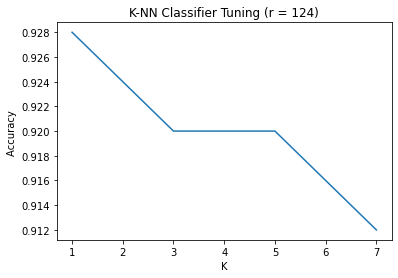


Highest Accuracy for α = 0.95 is 92.80000000000001 %
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


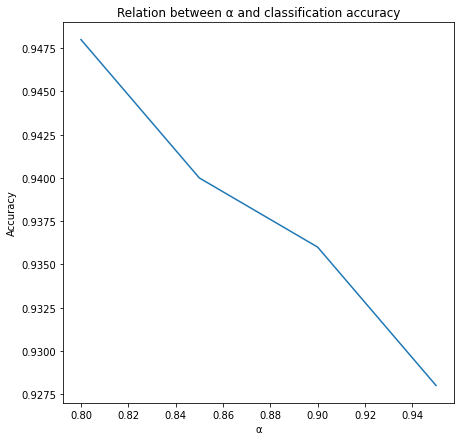


Highest Accuracy (94.8%) was at α = 0.8 and k = 1.



In [ ]:
accuracy_PCA_100_50 = PCA(D_train, y_train, D_test, y_test)
max_acc_PCA_50.append(accuracy_PCA_100_50)

> **LDA**

A) First Nearest Neighbor (k = 1), accuracy = 96.0 %

B) Classifier Tuning
for k = 1, the accuracy is 96.0 %
for k = 3, the accuracy is 93.2 %
for k = 5, the accuracy is 92.80000000000001 %
for k = 7, the accuracy is 92.4 %


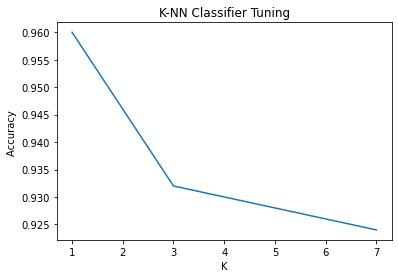


Highest Accuracy = 96.0 % at k = 1


In [ ]:
accuracy_LDA_100_50 = LDA(D_train, y_train, D_test, y_test, 0, 2, samples_count)
max_acc_LDA_50.append(accuracy_LDA_100_50)



---



> **II. Splitting 70:30 for both PCA and LDA.**

In [ ]:
D_train_70, D_test_30, y_train_70, y_test_30, samplesCount = split_70(500)

> **PCA**

Number of features after reduction for each alpha: [34, 50, 77, 124]


 1) α = 0.8

A) First Nearest Neighbor (k = 1), accuracy = 98.0 %

B) Classifier Tuning
for k = 1, the accuracy is 98.0 %
for k = 3, the accuracy is 96.66666666666667 %
for k = 5, the accuracy is 95.33333333333334 %
for k = 7, the accuracy is 94.66666666666667 %


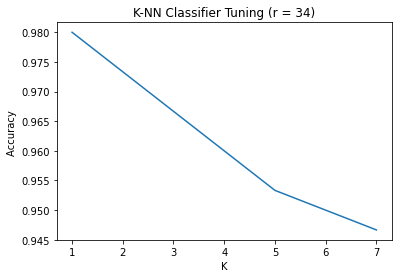


Highest Accuracy for α = 0.8 is 98.0 %
---------------------------------------------------------------------

 2) α = 0.85

A) First Nearest Neighbor (k = 1), accuracy = 98.66666666666667 %

B) Classifier Tuning
for k = 1, the accuracy is 98.66666666666667 %
for k = 3, the accuracy is 96.66666666666667 %
for k = 5, the accuracy is 95.33333333333334 %
for k = 7, the accuracy is 94.66666666666667 %


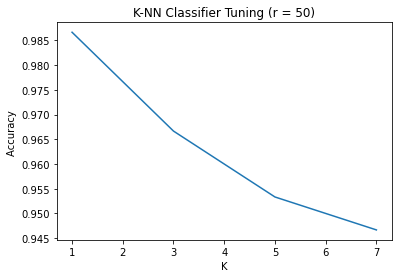


Highest Accuracy for α = 0.85 is 98.66666666666667 %
---------------------------------------------------------------------

 3) α = 0.9

A) First Nearest Neighbor (k = 1), accuracy = 98.66666666666667 %

B) Classifier Tuning
for k = 1, the accuracy is 98.66666666666667 %
for k = 3, the accuracy is 96.66666666666667 %
for k = 5, the accuracy is 95.33333333333334 %
for k = 7, the accuracy is 94.66666666666667 %


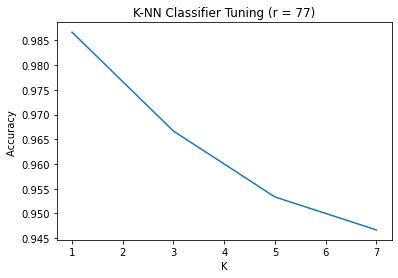


Highest Accuracy for α = 0.9 is 98.66666666666667 %
---------------------------------------------------------------------

 4) α = 0.95

A) First Nearest Neighbor (k = 1), accuracy = 97.33333333333334 %

B) Classifier Tuning
for k = 1, the accuracy is 97.33333333333334 %
for k = 3, the accuracy is 96.66666666666667 %
for k = 5, the accuracy is 95.33333333333334 %
for k = 7, the accuracy is 94.66666666666667 %


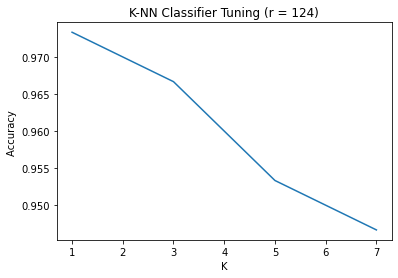


Highest Accuracy for α = 0.95 is 97.33333333333334 %
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


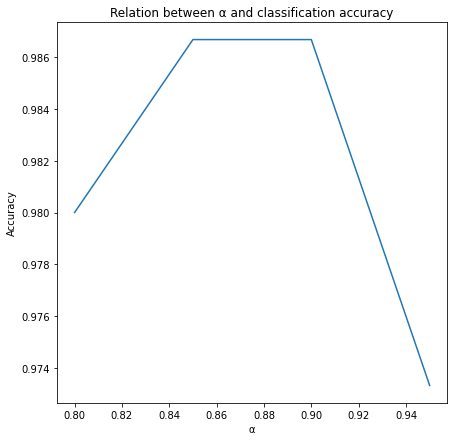


Highest Accuracy (98.66666666666667%) was at α = 0.9 and k = 1.



In [ ]:
accuracy_PCA_100_70 = PCA(D_train_70, y_train_70, D_test_30, y_test_30)
max_acc_PCA_70.append(accuracy_PCA_100_70)

> **LDA**

A) First Nearest Neighbor (k = 1), accuracy = 93.33333333333333 %

B) Classifier Tuning
for k = 1, the accuracy is 93.33333333333333 %
for k = 3, the accuracy is 92.66666666666666 %
for k = 5, the accuracy is 94.0 %
for k = 7, the accuracy is 92.0 %


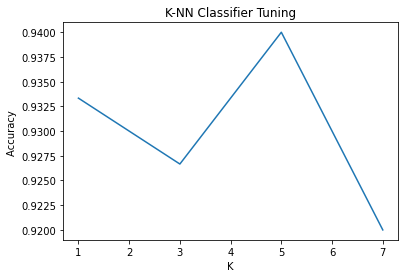


Highest Accuracy = 94.0 % at k = 1


In [ ]:
accuracy_LDA_100_70 = LDA(D_train_70, y_train_70, D_test_30, y_test_30, 1, 2, samplesCount)
max_acc_LDA_70.append(accuracy_LDA_100_70)



---


> **7**.
III. Plotting the accuracy vs the number of non-faces images while fixing 
the number of face images.


In [ ]:
number_of_nonfaces = [100, 200, 400]
max_acc_PCA_50 = max_acc_PCA_50[::-1]
max_acc_PCA_70 = max_acc_PCA_70[::-1]
max_acc_LDA_50 = max_acc_LDA_50[::-1]
max_acc_LDA_70 = max_acc_LDA_70[::-1]



---



> **PCA 50:50 vs 70:30**

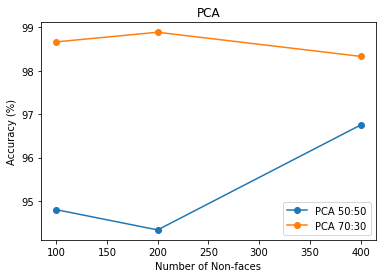

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title('PCA')
ax.set_xlabel('Number of Non-faces')
ax.set_ylabel('Accuracy (%)')
plt.plot(number_of_nonfaces, max_acc_PCA_50, marker = 'o', label = 'PCA 50:50')  
plt.plot(number_of_nonfaces, max_acc_PCA_70, marker = 'o', label = 'PCA 70:30')
plt.legend()
plt.show()

***COMMENTS***
- We think that PCA (70:30 split) decreases as the number of non-faces increases after 200 non-faces because maybe the 70% of data in the training set was enough and it didn't need more non-faces, but in (50:50 split) the accuracy increases as the number of non-faces increases but is less accurate than (70:30).



---




> **LDA 50:50 vs 70:30**

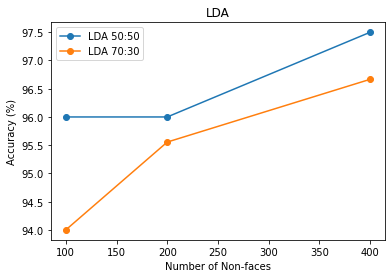

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.title('LDA')
ax.set_xlabel('Number of Non-faces')
ax.set_ylabel('Accuracy (%)')
plt.plot(number_of_nonfaces, max_acc_LDA_50, marker = 'o', label = 'LDA 50:50')  
plt.plot(number_of_nonfaces, max_acc_LDA_70, marker = 'o', label = 'LDA 70:30')
plt.legend()
plt.show()

***COMMENTS***
- We think that LDA (70:30 split) is less accurate because it takes more data than the (50:50), and because the non-face images are random images, it may introduce confusion and less accuracy. 
- However, in LDA for both the ratios, as the number of non-faces increase, the accuracy increase.



---



---



# Bonus of variations


## 1. PCA ->  Incremental PCA


> * Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. 
* Linear dimensionality reduction using Singular Value Decomposition of the data, keeping only the most significant singular vectors to project the data to a lower dimensional space.
* IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples. It is still dependent on the input data features, but changing the batch size allows for control of memory usage.








In [ ]:
def VariationPCA(X_train, yl_train, X_test, yl_test):
  x_scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
  x_n1 = x_scaler.fit_transform(X_train) #Fit to data, then transform it.
  x_n2 = x_scaler.fit_transform(X_test)
  for i in (36,52,76,115):
    ipca = IncrementalPCA(n_components=i, batch_size=None) 
    ipca.fit(x_n1)
    D_inc_train = ipca.transform(x_n1)
    D_inc_test = ipca.transform(x_n2)
    accuracies_PCA = []    
    k_neighbors = [1,3,5,7] 
    print("\nClassifier Tuning")
    for k in k_neighbors:
      accuracy = KNN(D_inc_train,D_inc_test,yl_train,yl_test,k)
      accuracies_PCA.append(accuracy)
      print(f"for k = {k}, the accuracy is {accuracy * 100} %")  

    plt.title(f'K-NN Classifier Tuning (r = {i})')
    plt.xlabel('K')
    plt.ylabel('Accuracy ')
    plt.plot(k_neighbors,accuracies_PCA)
    plt.show()
  print(f"\nHighest Accuracy = {max(accuracies_PCA)*100} % at k = 1") 


### 50:50 Split 


Classifier Tuning
for k = 1, the accuracy is 95.6 %
for k = 3, the accuracy is 93.60000000000001 %
for k = 5, the accuracy is 92.80000000000001 %
for k = 7, the accuracy is 92.80000000000001 %


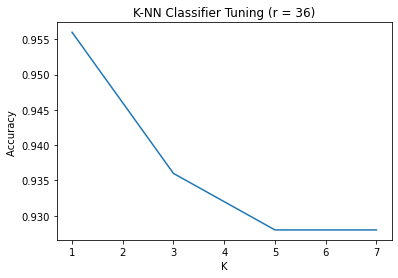


Classifier Tuning
for k = 1, the accuracy is 94.0 %
for k = 3, the accuracy is 93.2 %
for k = 5, the accuracy is 92.4 %
for k = 7, the accuracy is 91.60000000000001 %


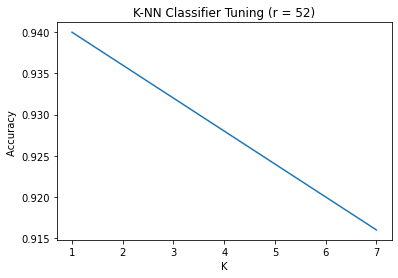


Classifier Tuning
for k = 1, the accuracy is 93.60000000000001 %
for k = 3, the accuracy is 92.0 %
for k = 5, the accuracy is 91.2 %
for k = 7, the accuracy is 90.4 %


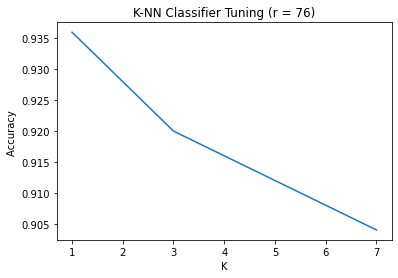


Classifier Tuning
for k = 1, the accuracy is 93.2 %
for k = 3, the accuracy is 91.60000000000001 %
for k = 5, the accuracy is 90.4 %
for k = 7, the accuracy is 90.0 %


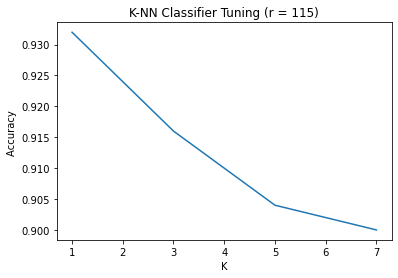


Highest Accuracy = 93.2 % at k = 1


In [ ]:
VariationPCA(D_train, y_train, D_test, y_test)

### 70:30 Split


Classifier Tuning
for k = 1, the accuracy is 96.66666666666667 %
for k = 3, the accuracy is 96.0 %
for k = 5, the accuracy is 94.66666666666667 %
for k = 7, the accuracy is 94.0 %


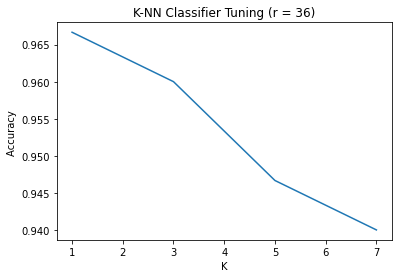


Classifier Tuning
for k = 1, the accuracy is 96.0 %
for k = 3, the accuracy is 95.33333333333334 %
for k = 5, the accuracy is 94.0 %
for k = 7, the accuracy is 93.33333333333333 %


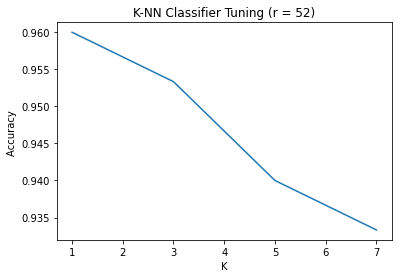


Classifier Tuning
for k = 1, the accuracy is 95.33333333333334 %
for k = 3, the accuracy is 93.33333333333333 %
for k = 5, the accuracy is 92.66666666666666 %
for k = 7, the accuracy is 92.66666666666666 %


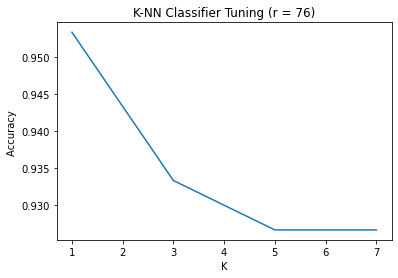


Classifier Tuning
for k = 1, the accuracy is 94.0 %
for k = 3, the accuracy is 93.33333333333333 %
for k = 5, the accuracy is 92.66666666666666 %
for k = 7, the accuracy is 93.33333333333333 %


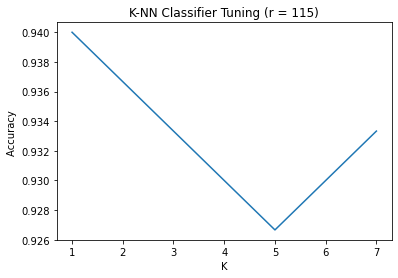


Highest Accuracy = 94.0 % at k = 1


In [ ]:
VariationPCA(D_train_70, y_train_70, D_test_30, y_test_30)

***COMMENTS***


The performance of this variation of PCA is much faster as it takes 1 second of execution time compared to the 6-8 minutes the normal PCA takes to execute.




## 2. LDA -> GDA


> *  Generalized discriminant analysis (GDA) is a commonly used method for dimensionality reduction. 
* In its general form, it seeks a nonlinear projection that simultaneously maximizes the between-class dissimilarity and minimizes the within-class dissimilarity to increase class separability.


